Вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [18]:
! pip install livelossplot

In [19]:
import matplotlib.pyplot as plt
import livelossplot
import numpy as np

from keras.callbacks import EarlyStopping
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, SimpleRNN, GRU, LSTM, Dense
from keras import optimizers, losses

In [20]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [21]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

In [23]:
def vectorize_sequences(sequences, dimension=max_features):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [24]:
print(x_train.shape)

(25000, 10000)


In [25]:
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(SimpleRNN(16))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160545 (627.13 KB)
Trainable params: 160545 (627.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

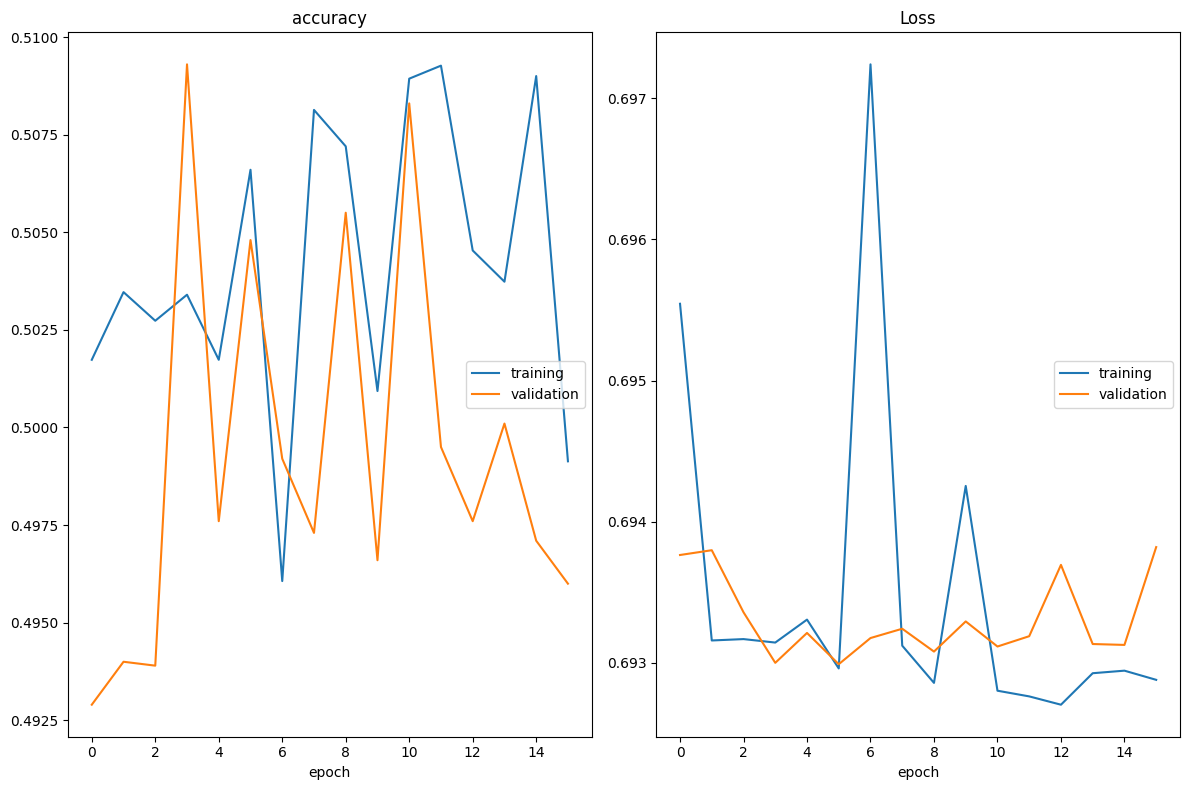

accuracy
	training         	 (min:    0.496, max:    0.509, cur:    0.499)
	validation       	 (min:    0.493, max:    0.509, cur:    0.496)
Loss
	training         	 (min:    0.693, max:    0.697, cur:    0.693)
	validation       	 (min:    0.693, max:    0.694, cur:    0.694)
30/30 [==============================] - 523s 17s/step - loss: 0.6929 - accuracy: 0.4991 - val_loss: 0.6938 - val_accuracy: 0.4960
Epoch 17/50
13/30 [============>.................] - ETA: 4:42 - loss: 0.6928 - accuracy: 0.5023

In [ ]:
plot_losses = livelossplot.PlotLossesKeras()
estop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, start_from_epoch=7, restore_best_weights=True)

history = model.fit(
    # x_train,
    # y_train,
    partial_x_train,
    partial_y_train,
    epochs=50,
    batch_size=512,
    callbacks=[plot_losses, estop],
    # validation_split=0.2
    validation_data=(x_val, y_val)
)